Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import data_prep as dp

Import Data

In [6]:
dat_val, dat_tr = dp.load_train_split()

Path to dataset files: /Users/anabellafalk/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [8]:
dat_tr.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
13,2019-01-01 00:07:27,5559857416065248,fraud_Kiehn Inc,grocery_pos,96.29,Jack,Hill,M,5916 Susan Bridge Apt. 939,Grenada,...,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,1325376447,41.657520,-122.230347,0
14,2019-01-01 00:09:03,3514865930894695,fraud_Beier-Hyatt,shopping_pos,7.77,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,1325376543,32.863258,-106.520205,0
20,2019-01-01 00:13:08,4469777115158234880,fraud_Bauch-Raynor,grocery_pos,57.34,Gregory,Graham,M,4005 Dana Glens,Methuen,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,139a1bee15be607d79fe173bfcb2502a,1325376788,42.268760,-71.217297,0


Potentially Significant predictors: category, amt, month/year

Controls/Identifiers: age, city pop, state?, job?

Others to consider: distance

### Extract Extra Columns

#### Extract Age

In [24]:
# Calculate and create age column
dp.extract_age(dat_tr)
dp.extract_age(dat_val)

### Bin Categorical Variables

#### Bin Jobs into Smaller Categories

In [15]:
dat_tr['job'].value_counts()

Water engineer                           6164
Petroleum engineer                       5161
Chartered loss adjuster                  5135
Radio broadcast assistant                4583
Surgeon                                  4138
                                         ... 
Chief of Staff                             11
Architect                                  11
Industrial buyer                           10
Development worker, international aid      10
Aeronautical engineer                       7
Name: job, Length: 192, dtype: int64

In [17]:
fraud_job = dat_tr.groupby('job')['is_fraud'].mean()
fraud_job

job
Administrator, charities/voluntary organisations    0.001981
Administrator, local government                     0.000000
Advertising account executive                       0.000000
Advice worker                                       0.000000
Aeronautical engineer                               1.000000
                                                      ...   
Toxicologist                                        0.000000
Trade mark attorney                                 0.005258
Video editor                                        0.000000
Water engineer                                      0.000000
Wellsite geologist                                  0.010711
Name: is_fraud, Length: 192, dtype: float64

(array([134.,  37.,  13.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          7.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

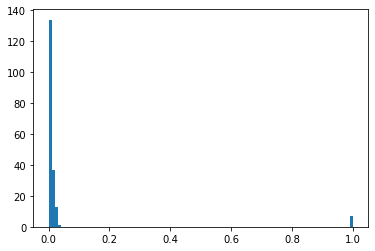

In [26]:
plt.hist(fraud_job.values, bins = 100)

##### Use Kmeans

In [57]:
from sklearn.cluster import KMeans
cluster = KMeans(3)

In [47]:
clusterings = cluster.fit_predict(fraud_job.values.reshape(-1,1))
clusterings

array([2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [48]:
cluster.cluster_centers_

array([[0.02015378],
       [1.        ],
       [0.00540699]])

In [30]:
fraud_job.shape

(192,)

In [49]:
clusterings.shape

(192,)

In [ ]:
job_bin = pd.Series(clusterings)
job_bin.index = fraud_job.index
job_bin

job
Administrator, charities/voluntary organisations    2
Administrator, local government                     2
Advertising account executive                       2
Advice worker                                       2
Aeronautical engineer                               1
                                                   ..
Toxicologist                                        2
Trade mark attorney                                 2
Video editor                                        2
Water engineer                                      2
Wellsite geologist                                  2
Length: 192, dtype: int32

In [71]:
dat_tr['job_bin'] = dat_tr['job'].apply(lambda x: job_bin.loc[x])

In [74]:
dat_tr[['job','job_bin']]

,job,job_bin
1,Special educational needs teacher,2
4,Dance movement psychotherapist,2
13,Systems analyst,2
14,Naval architect,2
20,Market researcher,2
...,...,...
1296647,Further education lecturer,2
1296652,Facilities manager,2
1296661,"Administrator, local government",2
1296667,Exercise physiologist,2


In [75]:
job_bin.loc['Naval architect']

2

With more data consider binning by median job salary or salary ratio to transaction amount

### Bin Numeric Variables

#### Bin Age to reduce levels

##### Quantile Binning

In [72]:
dat_tr['age_bin'] = pd.qcut(dat_tr['age_at_trans'].values, 7)
dat_tr['age_bin']

1            (34.0, 41.0]
4            (29.0, 34.0]
13           (64.0, 94.0]
14           (46.0, 53.0]
20           (34.0, 41.0]
                ...      
1296647      (53.0, 64.0]
1296652    (12.999, 29.0]
1296661    (12.999, 29.0]
1296667    (12.999, 29.0]
1296672      (46.0, 53.0]
Name: age_bin, Length: 319622, dtype: category
Categories (7, interval[float64, right]): [(12.999, 29.0] < (29.0, 34.0] < (34.0, 41.0] < (41.0, 46.0] < (46.0, 53.0] < (53.0, 64.0] < (64.0, 94.0]]

Use quantile bins fit by training data to transform validation data

In [ ]:
lst = []
for x in dat_tr['age_bin'].unique():
    lst = lst + [x]
lst.sort()
lst

[Interval(12.999, 29.0, closed='right'),
 Interval(29.0, 34.0, closed='right'),
 Interval(34.0, 41.0, closed='right'),
 Interval(41.0, 46.0, closed='right'),
 Interval(46.0, 53.0, closed='right'),
 Interval(53.0, 64.0, closed='right'),
 Interval(64.0, 94.0, closed='right')]

In [95]:
bins = []
for x in lst:
    bins = bins + [x.left]
bins.append(lst[len(lst)-1].right)
bins

[12.999, 29.0, 34.0, 41.0, 46.0, 53.0, 64.0, 94.0]

In [97]:
dat_val['age_bin'] = pd.cut(dat_val['age_at_trans'], bins=bins)
dat_val['age_bin']

0            (29.0, 34.0]
2            (53.0, 64.0]
3            (46.0, 53.0]
5            (53.0, 64.0]
6          (12.999, 29.0]
                ...      
1296669      (34.0, 41.0]
1296670      (53.0, 64.0]
1296671      (34.0, 41.0]
1296673      (34.0, 41.0]
1296674    (12.999, 29.0]
Name: age_bin, Length: 977053, dtype: category
Categories (7, interval[float64, right]): [(12.999, 29.0] < (29.0, 34.0] < (34.0, 41.0] < (41.0, 46.0] < (46.0, 53.0] < (53.0, 64.0] < (64.0, 94.0]]

Cap values to be within bin ranges

In [98]:
dat_val['age_bin'].unique()

[(29.0, 34.0], (53.0, 64.0], (46.0, 53.0], (12.999, 29.0], (64.0, 94.0], (41.0, 46.0], (34.0, 41.0], NaN]
Categories (7, interval[float64, right]): [(12.999, 29.0] < (29.0, 34.0] < (34.0, 41.0] < (41.0, 46.0] < (46.0, 53.0] < (53.0, 64.0] < (64.0, 94.0]]

In [99]:
dat_val['age_at_trans'].unique()

array([30, 56, 52, 57, 25, 71, 77, 44, 28, 29, 53, 66, 80, 72, 38, 73, 47,
       54, 41, 48, 34, 20, 31, 46, 32, 65, 24, 42, 37, 82, 21, 63, 51, 35,
       40, 18, 64, 83, 43, 23, 61, 91, 90, 92, 67, 33, 60, 17, 89, 68, 55,
       70, 50, 45, 59, 19, 15, 49, 87, 26, 36, 79, 58, 84, 14, 81, 62, 76,
       27, 39, 69, 75, 78, 88, 86, 22, 85, 74, 94, 93, 16, 95])

In [101]:
dat_val[dat_val['age_at_trans'] == 95]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_scale,city_pop_scale,age_at_trans,age_at_trans_scale,age_bin
658858,2019-10-07 13:08:44,2358122155477959,fraud_Sporer-Keebler,personal_care,13.05,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,f99e34be19f943c849010bf60a7c5e13,1349615324,40.158239,-76.748198,0,-0.355868,-0.218921,95,2.993261,NaN
659585,2019-10-07 17:35:20,2358122155477959,"fraud_Denesik, Powlowski and Pouros",home,37.50,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,badee0cae6dbe9374a82760bda10370e,1349631320,38.548975,-76.800262,0,-0.207058,-0.218921,95,2.993261,NaN
660820,2019-10-08 04:59:27,2358122155477959,fraud_O'Keefe-Hudson,grocery_pos,78.89,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,e2c43e375bf0c96feeee0cc0ac6aa42b,1349672367,38.228932,-77.436400,0,0.044854,-0.218921,95,2.993261,NaN
662898,2019-10-09 14:43:06,2358122155477959,fraud_Lubowitz-Walter,kids_pets,93.17,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,57803ffa109966e23d86ba4ce8b1a10f,1349793786,39.560235,-77.357184,0,0.131766,-0.218921,95,2.993261,NaN
664397,2019-10-10 11:03:59,2358122155477959,fraud_Schmitt Inc,gas_transport,54.79,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,29eab710b0749ae147b8b74f0c10f638,1349867039,38.636951,-75.744072,0,-0.101826,-0.218921,95,2.993261,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276619,2020-06-14 11:48:02,2358122155477959,"fraud_Nienow, Ankunding and Collier",misc_pos,22.38,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,8c031efea540913831513961592c5fce,1371210482,38.984146,-76.340649,0,-0.299083,-0.218921,95,2.993261,NaN
1286815,2020-06-17 02:11:33,2358122155477959,fraud_Kris-Padberg,shopping_pos,7.66,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,240788841f8ce6321a69ee820f6c3c6e,1371435093,39.578162,-76.091060,0,-0.388673,-0.218921,95,2.993261,NaN
1289248,2020-06-18 11:13:08,2358122155477959,fraud_Hermann and Sons,shopping_pos,4.32,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,1ac51306a67707b941ce1231aab4063b,1371553988,39.465638,-77.302455,0,-0.409001,-0.218921,95,2.993261,NaN
1289669,2020-06-18 15:37:54,2358122155477959,fraud_Dietrich-Fadel,health_fitness,5.45,Mike,Tran,M,17355 Mendoza Bypass Suite 059,Linthicum Heights,...,e2be26f329bf52f204970462106cb8a7,1371569874,38.358012,-75.702870,0,-0.402124,-0.218921,95,2.993261,NaN


In [ ]:
# cap age based on bin edges
dat_val['age_at_trans'].clip(29.0, 94.0)

0          30.0
2          56.0
3          52.0
5          57.0
6          29.0
           ... 
1296669    39.0
1296670    58.0
1296671    40.0
1296673    39.0
1296674    29.0
Name: age_at_trans, Length: 977053, dtype: float64

In [104]:
dat_val['age_at_trans'].iloc[658858]

21

In [ ]:
# check row got capped
dat_val['age_at_trans'].clip(29.0, 94.0).iloc[658858]

29.0

Visualize fraudulent transactions over age bins

In [ ]:
fraud_age_bins = dat_tr.groupby('age_bin')['is_fraud'].mean()
fraud_age_bins

age_bins
(12.999, 29.0]    0.007678
(29.0, 34.0]      0.003505
(34.0, 41.0]      0.003885
(41.0, 46.0]      0.004251
(46.0, 53.0]      0.006127
(53.0, 64.0]      0.007736
(64.0, 94.0]      0.008441
Name: is_fraud, dtype: float64

In [51]:
fraud_age_bins.index

CategoricalIndex([(12.999, 29.0],   (29.0, 34.0],   (34.0, 41.0],
                    (41.0, 46.0],   (46.0, 53.0],   (53.0, 64.0],
                    (64.0, 94.0]],
                 categories=[(12.999, 29.0], (29.0, 34.0], (34.0, 41.0], (41.0, 46.0], (46.0, 53.0], (53.0, 64.0], (64.0, 94.0]], ordered=True, dtype='category', name='age_bins')

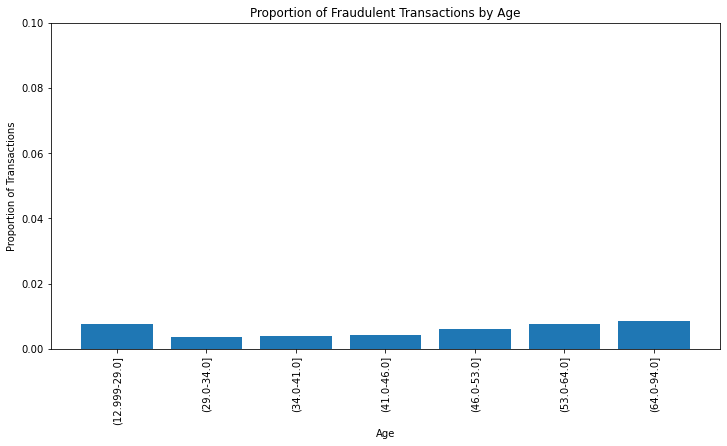

In [52]:
labels = [f"({interval.left}-{interval.right}]" for interval in fraud_age_bins.index]

plt.figure(figsize=(12, 6))
plt.bar(labels, fraud_age_bins.values)
plt.xticks(rotation=90)
plt.title('Proportion of Fraudulent Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Transactions')
plt.ylim(0,0.1)
plt.show()

##### KMeans Binning

In [58]:
age_cluster = KMeans(5)

In [59]:
fraud_age = dat_tr.groupby('age_at_trans')['is_fraud'].mean()

In [62]:
age_clusterings = age_cluster.fit_predict(fraud_age.values.reshape(-1,1))
age_clusterings

array([4, 1, 0, 4, 2, 4, 4, 0, 0, 1, 0, 1, 4, 0, 1, 1, 0, 4, 4, 1, 1, 4,
       1, 4, 0, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 0, 0, 4, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 3, 4, 3, 1, 1, 1, 2, 3, 1, 1, 0, 1, 0, 0, 4, 4, 3, 3, 0,
       0, 0, 0, 4, 3, 3, 2, 4, 4, 4, 4, 3, 3, 4, 1, 4], dtype=int32)

In [63]:
age_bin = pd.Series(age_clusterings)
age_bin.index = fraud_age.index

In [67]:
age_bin[:20]

age_at_trans
13    4
14    1
15    0
16    4
17    2
18    4
19    4
20    0
21    0
22    1
23    0
24    1
25    4
26    0
27    1
28    1
29    0
30    4
31    4
32    1
dtype: int32

In [65]:
dat_tr['age_at_trans'].apply(lambda x: age_bin.loc[x])

1          1
4          1
13         0
14         1
20         1
          ..
1296647    0
1296652    0
1296661    4
1296667    0
1296672    1
Name: age_at_trans, Length: 319622, dtype: int32

#### Bin Distance

#### Bin City Population

#### Bin Transaction Amt

### Scale Numeric Variables

In [1]:
from sklearn.preprocessing import StandardScaler

#### Scale Age

In [25]:
age_scaler = StandardScaler()

In [28]:
age_scaler.fit(dat_tr['age_at_trans'].values.reshape(-1,1))

StandardScaler()

In [ ]:
dat_tr['age_at_trans_scale'] = age_scaler.transform(dat_tr['age_at_trans'].values.reshape(-1,1))
dat_tr['age_at_trans_scale']

1         -0.327829
4         -0.810897
13         1.664825
14         0.336389
20        -0.448596
             ...   
1296647    0.638306
1296652   -1.837416
1296661   -1.233581
1296667   -0.992047
1296672    0.396772
Name: age_scale, Length: 319622, dtype: float64

In [30]:
dat_val['age_at_trans_scale'] = age_scaler.transform(dat_val['age_at_trans'].values.reshape(-1,1))
dat_val['age_at_trans_scale']

0         -0.931664
2          0.638306
3          0.396772
5          0.698689
6         -1.233581
             ...   
1296669   -0.388213
1296670    0.759073
1296671   -0.327829
1296673   -0.388213
1296674   -1.293965
Name: age_at_trans_scale, Length: 977053, dtype: float64

#### Scale Distance

#### Scale City Population

In [21]:
city_pop_scaler = StandardScaler()
city_pop_scaler.fit(dat_tr['city_pop'].values.reshape(-1,1))

StandardScaler()

In [22]:
dat_tr['city_pop_scale'] = city_pop_scaler.transform(dat_tr['city_pop'].values.reshape(-1,1))
dat_tr['city_pop_scale']

1         -0.269437
4         -0.269699
13        -0.267130
14        -0.265505
20        -0.022494
             ...   
1296647   -0.269212
1296652   -0.268818
1296661   -0.260938
1296667   -0.092985
1296672   -0.265505
Name: city_pop_scale, Length: 319622, dtype: float64

In [23]:
dat_val['city_pop_scale'] = city_pop_scaler.transform(dat_val['city_pop'].values.reshape(-1,1))
dat_val['city_pop_scale']

0         -0.251894
2         -0.248439
3         -0.260052
5         -0.258904
6         -0.256109
             ...   
1296669   -0.267550
1296670   -0.268866
1296671   -0.269694
1296673   -0.264315
1296674   -0.269075
Name: city_pop_scale, Length: 977053, dtype: float64

#### Scale Transaction Amount

In [10]:
amt_scaler = StandardScaler()

In [14]:
amt_scaler.fit(dat_tr['amt'].values.reshape(-1,1))

StandardScaler()

In [18]:
dat_tr['amt_scale'] = amt_scaler.transform(dat_tr['amt'].values.reshape(-1,1))
dat_tr['amt_scale']

1          0.217340
4         -0.179913
13         0.150756
14        -0.388003
20        -0.086306
             ...   
1296647   -0.373579
1296652    0.326345
1296661    0.038403
1296667   -0.315333
1296672    0.209427
Name: amt_scale, Length: 319622, dtype: float64

In [19]:
dat_val['amt_scale'] = amt_scaler.transform(dat_val['amt'].values.reshape(-1,1))
dat_val['amt_scale']

0         -0.405045
2          0.904361
3         -0.161411
5          0.140652
6         -0.164210
             ...   
1296669   -0.207788
1296670   -0.340591
1296671   -0.120632
1296673    0.020570
1296674   -0.409123
Name: amt_scale, Length: 977053, dtype: float64

### Encode Categorical Variables

In [101]:
from sklearn.preprocessing import OneHotEncoder

#### Encode Category

In [102]:
# Initialize one hot encoder
category_encoder = OneHotEncoder(sparse=False)

In [97]:
# Encode categories
category_enc = category_encoder.fit_transform(dat_tr['category'].values.reshape(-1,1))
category_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [98]:
category_enc.shape

(319622, 14)

In [99]:
category_encoder.categories_

[array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
        'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
        'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
        'travel'], dtype=object)]

In [ ]:
category_enc = pd.DataFrame(category_enc)
category_enc.columns = "category." + category_encoder.categories_[0]

category_enc

,category.entertainment,category.food_dining,category.gas_transport,category.grocery_net,category.grocery_pos,category.health_fitness,category.home,category.kids_pets,category.misc_net,category.misc_pos,category.personal_care,category.shopping_net,category.shopping_pos,category.travel
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319617,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319618,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319619,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Encode State